# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [735]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [736]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [737]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [740]:
# Try loading one file

df = pd.read_parquet('C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [746]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [747]:
# from google.colab import drive
# drive.mount('/content/drive')

In [748]:
file_path=['C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-1.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-2.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-3.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-4.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-5.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-6.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-7.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-8.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-9.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-10.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-11.parquet',
          'C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-12.parquet']

df_sampled_list = [] 
for file in file_path:
    df = pd.read_parquet(file)
    df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    df_sampled = df.groupby(["pickup_date", "pickup_hour"]).sample(frac=0.0075, random_state=42) # sampled earlier wih 5% but want to keep entries to 2.5-3L so dropped the frac percent to 0.75%
    df_sampled_list.append(df_sampled)
df_final = pd.concat(df_sampled_list, ignore_index=True)



After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [750]:
# Store the df in csv/parquet
df_final.to_csv('df_final.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [753]:
# Load the new data file
df_final = pd.read_csv('df_final.csv')

In [754]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             284492 non-null  int64  
 1   VendorID               284492 non-null  int64  
 2   tpep_pickup_datetime   284492 non-null  object 
 3   tpep_dropoff_datetime  284492 non-null  object 
 4   passenger_count        274735 non-null  float64
 5   trip_distance          284492 non-null  float64
 6   RatecodeID             274735 non-null  float64
 7   store_and_fwd_flag     274735 non-null  object 
 8   PULocationID           284492 non-null  int64  
 9   DOLocationID           284492 non-null  int64  
 10  payment_type           284492 non-null  int64  
 11  fare_amount            284492 non-null  float64
 12  extra                  284492 non-null  float64
 13  mta_tax                284492 non-null  float64
 14  tip_amount             284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [757]:
# Fix the index and drop any columns that are not needed
df_final.drop('Unnamed: 0', axis=1, inplace=True)
df_final.drop('store_and_fwd_flag',axis=1,inplace=True)


In [758]:
df_final.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:59:47   2023-01-01 01:23:42              NaN   
1         2  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
2         2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
3         1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
4         2  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.00         NaN            68            45             0   
1           0.99         1.0           144           211             2   
2           0.92         1.0            79           107             1   
3           2.30         1.0            48           238             1   
4           2.27         1.0            68           137             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0         35.3  ...      0.5        0.00           0.0                    1.0   
1          7.2  ...      0.5        0.00           0.0                    1.0   
2          7.2  ...      0.5        3.05           0.0                    1.0   
3         13.5  ...      0.5        4.60           0.0                    1.0   
4         18.4  ...      0.5        4.68           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         39.30                   NaN          NaN   2023-01-01           0   
1         12.20                   2.5          0.0   2023-01-01           0   
2         15.25                   2.5          0.0   2023-01-01           0   
3         23.10                   2.5          0.0   2023-01-01           0   
4         28.08                   2.5          0.0   2023-01-01           0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [760]:
# Combine the two airport fee columns
df_final['Airport_fee']=df_final['Airport_fee'].mask(df_final['Airport_fee'].isna(),df_final['airport_fee'])

In [761]:
df_final.drop(['airport_fee'],axis=1,inplace=True)

In [762]:
df_final.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:59:47   2023-01-01 01:23:42              NaN   
1         2  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
2         2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
3         1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
4         2  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.00         NaN            68            45             0   
1           0.99         1.0           144           211             2   
2           0.92         1.0            79           107             1   
3           2.30         1.0            48           238             1   
4           2.27         1.0            68           137             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         35.3    0.0      0.5        0.00           0.0   
1          7.2    1.0      0.5        0.00           0.0   
2          7.2    1.0      0.5        3.05           0.0   
3         13.5    3.5      0.5        4.60           0.0   
4         18.4    1.0      0.5        4.68           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         39.30                   NaN  2023-01-01   
1                    1.0         12.20                   2.5  2023-01-01   
2                    1.0         15.25                   2.5  2023-01-01   
3                    1.0         23.10                   2.5  2023-01-01   
4                    1.0         28.08                   2.5  2023-01-01   

   pickup_hour  Airport_fee  
0            0          NaN  
1            0          0.0  
2            0          0.0  
3            0          0.0  
4            0          0.0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [764]:
# check where values of fare amount are negative
df_final[df_final['fare_amount'] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [766]:
# Analyse RatecodeID for the negative fare amounts
df_final.loc[df_final['fare_amount']<0,'RatecodeID'] #there are no negative values in the fare_amount column


Series([], Name: RatecodeID, dtype: float64)

In [767]:
# Find which columns have negative values
df_final[df_final['mta_tax']<0] #mta_tax have negative values   
df_final[df_final['extra']<0] # no negative values
df_final[df_final['tip_amount']<0] # no negative values
df_final[df_final['tolls_amount']<0] # no negative value
df_final[df_final['improvement_surcharge']<0] #have negative values
df_final[df_final['total_amount']<0] #have negative values
df_final[df_final['congestion_surcharge']<0] #have negative values



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6717           2  2023-01-11 00:00:21   2023-01-11 00:00:34              1.0   
45119          2  2023-03-28 14:38:01   2023-03-28 14:38:13              1.0   
89640          2  2023-08-25 21:14:13   2023-08-25 21:19:14              1.0   
96412          2  2023-02-04 13:23:51   2023-02-04 13:46:55              1.0   
204537         2  2023-09-26 11:40:03   2023-09-26 11:40:28              2.0   
209331         2  2023-10-01 22:59:26   2023-10-01 23:09:29              2.0   
220177         2  2023-10-14 23:43:00   2023-10-14 23:55:37              1.0   
254959         2  2023-11-25 11:12:22   2023-11-25 11:15:18              2.0   
266597         2  2023-12-08 21:45:27   2023-12-08 21:50:27              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6717             0.00         1.0           263           263             2   
45119            0.00         2.0           107           107             2   
89640            0.54         2.0           238           238             2   
96412            0.00         1.0           138           234             2   
204537           0.03         2.0           163           163             2   
209331           1.72         1.0           107           211             2   
220177           1.77         1.0           113           186             2   
254959           0.27         1.0           161           162             2   
266597           0.96         2.0           142           239             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
6717            0.0    0.0     -0.5         0.0           0.0   
45119           0.0    0.0     -0.5         0.0           0.0   
89640           0.0    0.0     -0.5         0.0           0.0   
96412           0.0    0.0     -0.5         0.0           0.0   
204537          0.0    0.0     -0.5         0.0           0.0   
209331          0.0    0.0     -0.5         0.0           0.0   
220177          0.0    0.0     -0.5         0.0           0.0   
254959          0.0    0.0     -0.5         0.0           0.0   
266597          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
6717                     -1.0         -4.00                  -2.5  2023-01-11   
45119                    -1.0         -4.00                  -2.5  2023-03-28   
89640                    -1.0         -4.00                  -2.5  2023-08-25   
96412                    -1.0         -5.25                  -2.5  2023-02-04   
204537                   -1.0         -4.00                  -2.5  2023-09-26   
209331                   -1.0         -4.00                  -2.5  2023-10-01   
220177                   -1.0         -4.00                  -2.5  2023-10-14   
254959                   -1.0         -4.00                  -2.5  2023-11-25   
266597                   -1.0         -4.00                  -2.5  2023-12-08   

        pickup_hour  Airport_fee  
6717              0         0.00  
45119            14         0.00  
89640            21         0.00  
96412            13        -1.25  
204537           11         0.00  
209331           22         0.00  
220177           23         0.00  
254959           11         0.00  
266597           21         0.00

In [768]:
# fix these negative values

print((df_final['mta_tax']<0).value_counts())
print((df_final['improvement_surcharge']<0).value_counts())
print((df_final['total_amount']<0).value_counts())
print((df_final['congestion_surcharge']<0).value_counts()) 

# replacing all the negative velues with zero , dont want to drop data 
df_final.loc[df_final['mta_tax'] < 0, 'mta_tax'] = 0
df_final.loc[df_final['improvement_surcharge'] < 0, 'improvement_surcharge'] = 0
df_final.loc[df_final['total_amount'] < 0, 'total_amount'] = 0
df_final.loc[df_final['congestion_surcharge']<0,'congestion_surcharge'] = 0

print((df_final['mta_tax']<0).value_counts())
print((df_final['improvement_surcharge']<0).value_counts())
print((df_final['total_amount']<0).value_counts())
print((df_final['congestion_surcharge']<0).value_counts()) 

mta_tax
False    284478
True         14
Name: count, dtype: int64
improvement_surcharge
False    284477
True         15
Name: count, dtype: int64
total_amount
False    284477
True         15
Name: count, dtype: int64
congestion_surcharge
False    284483
True          9
Name: count, dtype: int64
mta_tax
False    284492
Name: count, dtype: int64
improvement_surcharge
False    284492
Name: count, dtype: int64
total_amount
False    284492
Name: count, dtype: int64
congestion_surcharge
False    284492
Name: count, dtype: int64


In [769]:
df_final.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          9757
trip_distance               0
RatecodeID               9757
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     9757
pickup_date                 0
pickup_hour                 0
Airport_fee              9757
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [772]:
# Find the proportion of missing values in each column
df_final.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.429622
trip_distance            0.000000
RatecodeID               3.429622
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.429622
pickup_date              0.000000
pickup_hour              0.000000
Airport_fee              3.429622
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [774]:
# Display the rows with null values
# Impute NaN values in 'passenger_count' 
df_final[df_final['passenger_count'].isnull()]
df_final['passenger_count'] = df_final['passenger_count'].fillna(1) # df_final['passenger_count'].median()

Did you find zeroes in passenger_count? Handle these.

In [776]:
(df_final['passenger_count']==0).value_counts()

passenger_count
False    280161
True       4331
Name: count, dtype: int64

In [777]:
df_final['passenger_count'].describe()

count    284492.000000
mean          1.356242
std           0.878332
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

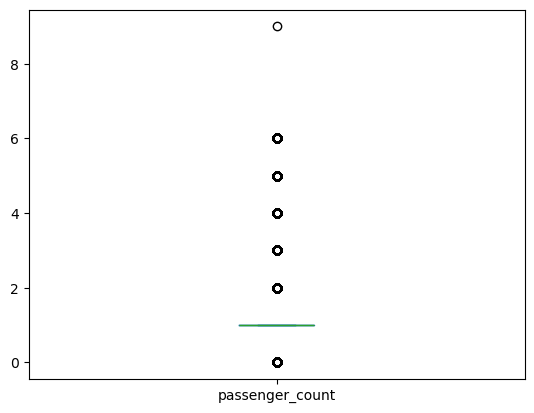

In [778]:
df_final['passenger_count'].plot.box()
plt.show()

In [779]:
# ohk so analysing numerically and visually , majority of the data seems to be near the median , 
#even quantiles as the zero values are merely 1.5% of dataset it shouldnot affect our analyis 
#so to maintain consistency in the dataset i would replace zero as well with median value
df_final['passenger_count'] = df_final['passenger_count'].replace(0,1)



**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [781]:
# Fix missing values in 'RatecodeID'
df_final['RatecodeID'].isna().value_counts()
df_final['RatecodeID'].value_counts()

RatecodeID
1.0     259197
2.0      10919
99.0      1580
5.0       1572
3.0        889
4.0        578
Name: count, dtype: int64

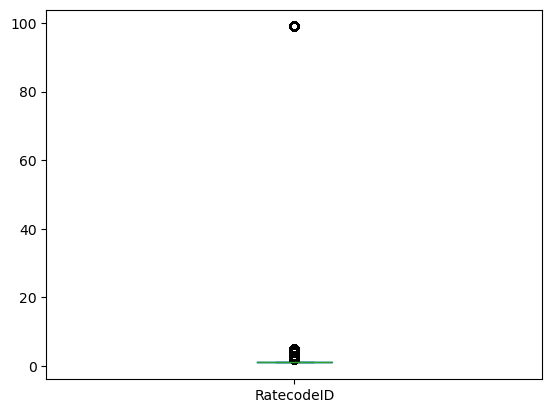

In [782]:
df_final['RatecodeID'].plot.box()
plt.show()

In [783]:
df_final['RatecodeID']= df_final['RatecodeID'].fillna(1) #mode value 

In [784]:
df_final.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     9757
pickup_date                 0
pickup_hour                 0
Airport_fee              9757
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [786]:
# handle null values in congestion_surcharge
df_final['congestion_surcharge'].describe()
df_final['congestion_surcharge'] = df_final['congestion_surcharge'].fillna(df_final['congestion_surcharge'].median())

In [787]:
df_final.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
pickup_date                 0
pickup_hour                 0
Airport_fee              9757
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [789]:
# Handle any remaining missing values
df_final['Airport_fee'].describe()
df_final['Airport_fee'] = df_final['Airport_fee'].fillna(0) # filling with mean/median/mode value which is 0 

In [790]:
df_final.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [793]:
df_final.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:59:47   2023-01-01 01:23:42              1.0   
1         2  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
2         2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
3         1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
4         2  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.00         1.0            68            45             0   
1           0.99         1.0           144           211             2   
2           0.92         1.0            79           107             1   
3           2.30         1.0            48           238             1   
4           2.27         1.0            68           137             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         35.3    0.0      0.5        0.00           0.0   
1          7.2    1.0      0.5        0.00           0.0   
2          7.2    1.0      0.5        3.05           0.0   
3         13.5    3.5      0.5        4.60           0.0   
4         18.4    1.0      0.5        4.68           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         39.30                   2.5  2023-01-01   
1                    1.0         12.20                   2.5  2023-01-01   
2                    1.0         15.25                   2.5  2023-01-01   
3                    1.0         23.10                   2.5  2023-01-01   
4                    1.0         28.08                   2.5  2023-01-01   

   pickup_hour  Airport_fee  
0            0          0.0  
1            0          0.0  
2            0          0.0  
3            0          0.0  
4            0          0.0

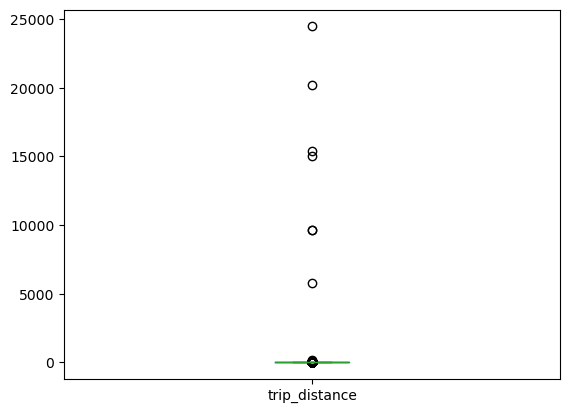

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
842            1  2023-01-02 16:15:12   2023-01-02 17:17:53              1.0   
40473          2  2023-03-22 16:53:39   2023-03-22 18:47:26              1.0   
41144          2  2023-03-23 13:33:28   2023-03-23 15:33:39              3.0   
51439          2  2023-06-04 20:35:35   2023-06-04 21:44:30              1.0   
56650          2  2023-06-10 22:43:49   2023-06-10 23:57:06              1.0   
57472          2  2023-06-12 01:00:35   2023-06-12 02:53:36              1.0   
60043          2  2023-06-15 00:41:34   2023-06-15 01:35:12              1.0   
66237          2  2023-06-22 18:21:28   2023-06-22 19:40:31              1.0   
66868          2  2023-06-23 14:56:21   2023-06-23 15:28:14              1.0   
72146          2  2023-06-30 10:12:47   2023-06-30 12:03:03              1.0   
72546          2  2023-06-30 19:57:48   2023-06-30 20:06:13              1.0   
74008          2  2023-08-02 20:16:38   2023-08-02 21:26:24              1.0   
78799          2  2023-08-09 19:23:48   2023-08-09 20:47:19              1.0   
87164          2  2023-08-22 10:34:00   2023-08-22 11:06:00              1.0   
91910          2  2023-08-29 14:51:34   2023-08-29 16:31:04              1.0   
94749          2  2023-02-02 13:48:14   2023-02-02 16:40:33              1.0   
97519          2  2023-02-06 03:08:00   2023-02-06 03:15:00              1.0   
106554         2  2023-02-17 14:31:41   2023-02-17 16:21:12              3.0   
125437         2  2023-04-13 22:01:59   2023-04-13 23:22:54              1.0   
128062         2  2023-04-16 23:56:01   2023-04-17 01:00:09              1.0   
131459         2  2023-04-20 23:11:59   2023-04-21 00:55:32              2.0   
140445         2  2023-05-01 21:14:00   2023-05-01 21:31:00              1.0   
143199         2  2023-05-04 23:41:42   2023-05-05 00:47:21              1.0   
147132         2  2023-05-09 19:34:49   2023-05-09 20:52:42              1.0   
162538         2  2023-05-27 07:07:48   2023-05-27 08:10:36              1.0   
164474         2  2023-05-30 11:14:31   2023-05-30 12:23:22              6.0   
167887         2  2023-07-04 23:09:20   2023-07-05 00:18:03              1.0   
172617         1  2023-07-12 05:43:03   2023-07-12 06:52:42              1.0   
176688         2  2023-07-17 15:14:20   2023-07-17 17:24:17              1.0   
181632         2  2023-07-24 05:04:00   2023-07-24 05:34:00              1.0   
182260         2  2023-07-24 23:09:04   2023-07-25 00:08:19              4.0   
187439         2  2023-07-31 22:52:30   2023-07-31 23:48:26              1.0   
194700         1  2023-09-10 15:21:56   2023-09-10 17:40:16              2.0   
195000         1  2023-09-10 23:15:27   2023-09-11 00:42:18              1.0   
204015         2  2023-09-25 16:55:32   2023-09-25 18:23:29              2.0   
214785         2  2023-10-08 14:20:17   2023-10-08 15:35:02              1.0   
223168         2  2023-10-18 17:03:20   2023-10-18 17:56:05              1.0   
226740         2  2023-10-22 15:15:36   2023-10-22 16:17:54              1.0   
234849         2  2023-11-01 08:31:42   2023-11-01 08:46:56              1.0   
240962         2  2023-11-08 09:24:00   2023-11-08 09:45:00              1.0   
251384         2  2023-11-19 19:13:06   2023-11-19 20:17:12              1.0   
255803         2  2023-11-26 15:00:47   2023-11-26 16:50:07              1.0   
284188         2  2023-12-31 15:31:48   2023-12-31 16:45:20              3.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
842             54.20         1.0           138           265             2   
40473           52.51         5.0           132           265             1   
41144           53.58         3.0           132           265             2   
51439           56.29         4.0           132           265             1   
56650           53.32         4.0           132           265             1   
57472        

In [794]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df_final['trip_distance'].describe() # seems to have outliers
df_final['trip_distance'].plot.box()
plt.show()
df_final[df_final['trip_distance']>50]

In [795]:
# Compute Q1, Q3, and IQR
Q1 = df_final['trip_distance'].quantile(0.25)
Q3 = df_final['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
outliers = df_final[(df_final['trip_distance'] < lower_bound) | (df_final['trip_distance'] > upper_bound)]


In [796]:
invalid_trip_index = df_final[(df_final['trip_distance'] == 0) & (df_final['fare_amount'] > 300)].index
df_final = df_final.drop(invalid_trip_index)

In [797]:
invalid_fare_amount_index = df_final[(df_final['trip_distance'] == 0) & (df_final['fare_amount'] == 0) & (df_final['PULocationID']!= df_final['DOLocationID'])].index
df_final = df_final.drop(invalid_fare_amount_index)

In [798]:
higher_trip_distance_index = df_final[df_final['trip_distance']>250].index
df_final = df_final.drop(higher_trip_distance_index)

In [799]:
df_final[df_final['payment_type']==0] #total 9752 entries so we cant just drop those lets keep them and change the type to 5 which is unkown
df_final['payment_type'] = df_final['payment_type'].replace(0,5)
df_final[df_final['payment_type']==5]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2023-01-01 00:59:47   2023-01-01 01:23:42              1.0   
7              1  2023-01-01 00:57:48   2023-01-01 01:12:34              1.0   
17             2  2023-01-01 00:39:50   2023-01-01 00:54:29              1.0   
39             2  2023-01-01 00:43:19   2023-01-01 01:03:29              1.0   
76             2  2023-01-01 01:15:34   2023-01-01 01:29:55              1.0   
...          ...                  ...                   ...              ...   
284478         2  2023-12-31 23:01:04   2023-12-31 23:23:37              1.0   
284481         2  2023-12-31 23:28:44   2023-12-31 23:51:48              1.0   
284482         2  2023-12-31 23:04:34   2023-12-31 23:13:58              1.0   
284484         1  2023-12-31 23:04:23   2023-12-31 23:20:25              1.0   
284488         1  2023-12-31 23:32:40   2023-12-31 23:43:08              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                0.00         1.0            68            45             5   
7                0.00         1.0           237           263             5   
17               7.53         1.0           213             7             5   
39               4.41         1.0           211           181             5   
76               3.01         1.0           209           234             5   
...               ...         ...           ...           ...           ...   
284478           6.58         1.0           238           211             5   
284481           6.61         1.0           238           114             5   
284482           1.34         1.0           233           163             5   
284484           0.00         1.0           145            37             5   
284488           0.00         1.0           161           114             5   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             35.30    0.0      0.5        0.00          0.00   
7             12.00    1.0      0.5        2.55          0.00   
17            30.97    0.0      0.5        4.00          6.55   
39            24.27    0.0      0.5        5.65          0.00   
76            24.59    0.0      0.5        2.86          0.00   
...             ...    ...      ...         ...           ...   
284478        29.90    0.0      0.5        0.00          0.00   
284481        30.78    0.0      0.5        0.00          0.00   
284482        12.08    0.0      0.5        0.00          0.00   
284484        20.70    0.0      0.5        0.00          0.00   
284488        21.72    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                         1.0         39.30                   2.5  2023-01-01   
7                         1.0         21.55                   2.5  2023-01-01   
17                        1.0         43.02                   2.5  2023-01-01   
39                        1.0         33.92                   2.5  2023-01-01   
76                        1.0         31.45                   2.5  2023-01-01   
...                       ...           ...                   ...         ...   
284478                    1.0         33.90                   2.5  2023-12-31   
284481                    1.0         34.78                   2.5  2023-12-31   
284482                    1.0         16.08                   2.5  2023-12-31   
284484                    1.0         22.20                   2.5  2023-12-31   
284488                    1.0         25.72                   2.5  2023-12-31   

        pickup_hour  Airport_fee  
0                 0          0.0  
7                 0          0.0  
17                0          0.0  
39                0          0.0  
76                1          0.0  
...             ...          ...  
284478           23          0.0  
284481           23          0.0  
284482           23          

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [803]:
# remove passenger_count > 6
print(df_final['passenger_count'].value_counts())
df_final = df_final.loc[df_final['passenger_count'] <= 6]

passenger_count
1.0    220910
2.0     41454
3.0     10355
4.0      5854
5.0      3521
6.0      2371
9.0         1
Name: count, dtype: int64


In [804]:
print(df_final['passenger_count'].value_counts())

passenger_count
1.0    220910
2.0     41454
3.0     10355
4.0      5854
5.0      3521
6.0      2371
Name: count, dtype: int64


In [805]:
# Continue with outlier handling
 
# print(df_final['fare_amount'].describe()) #seems to have outlier
# print(df_final['tip_amount'].describe()) # seem to have outlier
# print(df_final['total_amount'].describe()) #have outlier

# print(df_final['mta_tax'].describe()) # no outliers
# print(df_final['tolls_amount'].describe()) #no outliers
# print(df_final['improvement_surcharge'].describe()) # doesnt seem to have any outliers

# print(df_final['congestion_surcharge'].describe()) #no outliers


In [806]:
df_final[df_final['extra']>50]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
120706         1  2023-04-07 19:39:00   2023-04-07 19:44:28              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
120706            5.0         1.0           170           234             4   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
120706          7.2  96.38      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
120706                    1.0        104.58                   2.5  2023-04-07   

        pickup_hour  Airport_fee  
120706           19          0.0

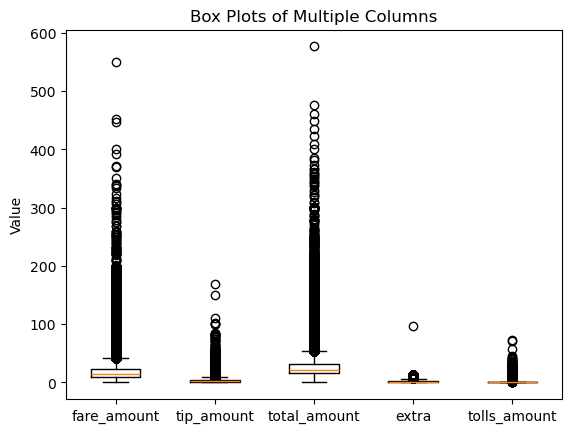

In [807]:
data = [df_final['fare_amount'], df_final['tip_amount'], df_final['total_amount'],df_final['extra'],df_final['tolls_amount']]
labels = ['fare_amount', 'tip_amount', 'total_amount','extra','tolls_amount']

plt.boxplot(data, labels=labels)
plt.title('Box Plots of Multiple Columns')
plt.ylabel('Value')
plt.show()

In [808]:
#Analysing certain columns for outliers
columns_list = ['total_amount','fare_amount','tip_amount','extra','tolls_amount']
quartiles = df_final[columns_list].quantile([0.25,0.50,0.75,0.99,0.9999])
quartiles.index=['25th percentile','50th percentile','75th percentile','99th percentile','99.99th percentile']
print(quartiles)

                    total_amount  fare_amount  tip_amount  extra  tolls_amount
25th percentile        15.960000      9.30000    1.000000   0.00          0.00
50th percentile        21.000000     13.50000    2.850000   1.00          0.00
75th percentile        31.000000     22.40000    4.420000   2.50          0.00
99th percentile       103.910000     76.90000   17.550000   7.50          6.94
99.99th percentile    314.174368    282.21264   62.466144  11.75         30.00


In [809]:
fare_amount_outlier_index = df_final[df_final['fare_amount']>450].index
df_final = df_final.drop(fare_amount_outlier_index)    # removing the clear outliers and keeping the outliers which are making sense for further analysis

In [810]:
total_amount_outlier_index = df_final[df_final['total_amount']>500].index
df_final = df_final.drop(total_amount_outlier_index)  # removing the clear outliers and keeping the outliers which are making sense for further analysis

In [811]:
tip_amount_outlier_index = df_final[df_final['tip_amount']>150].index
df_final = df_final.drop(tip_amount_outlier_index)

In [812]:
extra_index = df_final[df_final['extra']>20].index
df_final = df_final.drop(extra_index)

In [813]:
df_final['VendorID'].value_counts(normalize=True)*100

VendorID
2    73.489863
1    26.485177
6     0.024959
Name: proportion, dtype: float64

In [814]:
#There are some invalid vendor_ID in the data so considering the dataisze its negligible so we an just replce those with mode
df_final['VendorID'] = df_final['VendorID'].replace(6,2)

In [815]:
df_final['VendorID'].value_counts(normalize=True)*100

VendorID
2    73.514823
1    26.485177
Name: proportion, dtype: float64

In [816]:
# Do any columns need standardising?



In [817]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284461 entries, 0 to 284491
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284461 non-null  int64  
 1   tpep_pickup_datetime   284461 non-null  object 
 2   tpep_dropoff_datetime  284461 non-null  object 
 3   passenger_count        284461 non-null  float64
 4   trip_distance          284461 non-null  float64
 5   RatecodeID             284461 non-null  float64
 6   PULocationID           284461 non-null  int64  
 7   DOLocationID           284461 non-null  int64  
 8   payment_type           284461 non-null  int64  
 9   fare_amount            284461 non-null  float64
 10  extra                  284461 non-null  float64
 11  mta_tax                284461 non-null  float64
 12  tip_amount             284461 non-null  float64
 13  tolls_amount           284461 non-null  float64
 14  improvement_surcharge  284461 non-null  f

In [818]:
df_final.to_csv('df_final.csv')

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [820]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Temporal
* `tpep_dropoff_datetime` : Temporal
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categrorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: numerical
* `extra`: numerical
* `mta_tax`: numerical
* `tip_amount`: numerical
* `tolls_amount`:numerical
* `improvement_surcharge`: numerical
* `total_amount`: numerical
* `congestion_surcharge`: numerical
* `airport_fee`: numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [825]:
df_final.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:59:47   2023-01-01 01:23:42              1.0   
1         2  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
2         2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
3         1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
4         2  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.00         1.0            68            45             5   
1           0.99         1.0           144           211             2   
2           0.92         1.0            79           107             1   
3           2.30         1.0            48           238             1   
4           2.27         1.0            68           137             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         35.3    0.0      0.5        0.00           0.0   
1          7.2    1.0      0.5        0.00           0.0   
2          7.2    1.0      0.5        3.05           0.0   
3         13.5    3.5      0.5        4.60           0.0   
4         18.4    1.0      0.5        4.68           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         39.30                   2.5  2023-01-01   
1                    1.0         12.20                   2.5  2023-01-01   
2                    1.0         15.25                   2.5  2023-01-01   
3                    1.0         23.10                   2.5  2023-01-01   
4                    1.0         28.08                   2.5  2023-01-01   

   pickup_hour  Airport_fee  
0            0          0.0  
1            0          0.0  
2            0          0.0  
3            0          0.0  
4            0          0.0

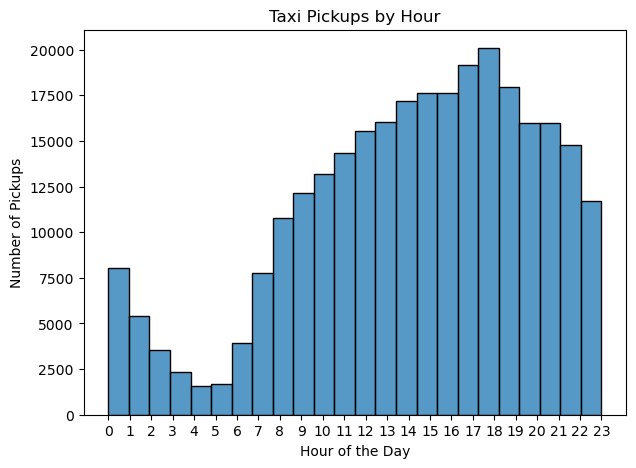

In [826]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(7, 5))
sns.histplot(df_final['pickup_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Hour')
plt.xticks(range(24))
plt.show()


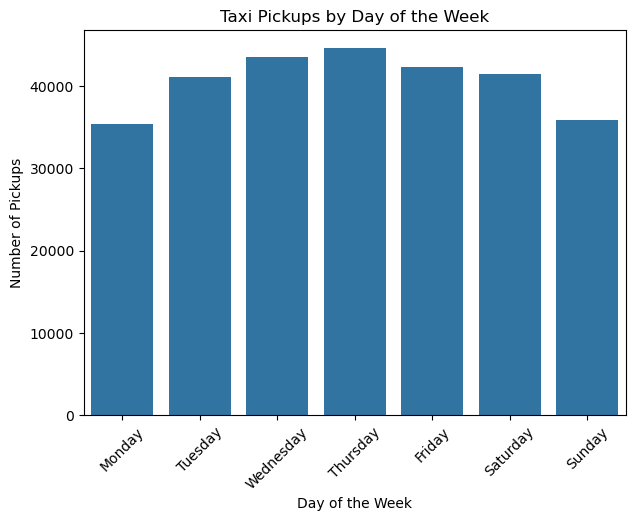

In [827]:
# Find and show the daily trends in taxi pickups (days of the week)
df_final['pickup_date'] = pd.to_datetime(df_final['pickup_date'])  # Ensure datetime format
df_final['day_of_week'] = df_final['pickup_date'].dt.day_name()

# df_final.groupby(['day_of_week','pickup_hour']).size()
days_sequence = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(7, 5))
sns.countplot(data=df_final, x='day_of_week', order=days_sequence)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Day of the Week')
plt.xticks(rotation=45)
plt.show()


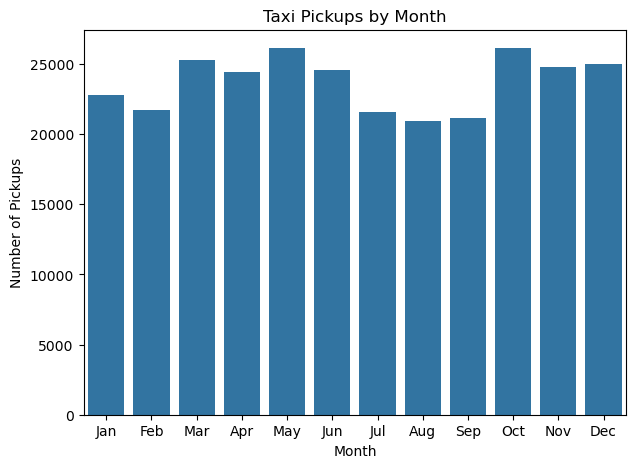

In [828]:
# Show the monthly trends in pickups
df_final['month'] = df_final['pickup_date'].dt.strftime('%b') 
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(7, 5))

sns.countplot(data=df_final,x='month',order=month_order)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Month')

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [831]:
# Analyse the above parameters
df_final[df_final['fare_amount']<=0]
df_final[df_final['tip_amount']<=0]
df_final[df_final['total_amount']<=0]
df_final[df_final['trip_distance']<=0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2023-01-01 00:59:47   2023-01-01 01:23:42              1.0   
7              1  2023-01-01 00:57:48   2023-01-01 01:12:34              1.0   
56             2  2023-01-01 01:23:27   2023-01-01 01:23:39              1.0   
60             2  2023-01-01 01:52:06   2023-01-01 01:52:58              1.0   
112            1  2023-01-01 02:44:46   2023-01-01 02:45:26              3.0   
...          ...                  ...                   ...              ...   
284399         1  2023-12-31 21:28:11   2023-12-31 21:45:40              1.0   
284404         1  2023-12-31 21:06:07   2023-12-31 21:11:35              1.0   
284452         1  2023-12-31 22:42:11   2023-12-31 22:55:42              1.0   
284484         1  2023-12-31 23:04:23   2023-12-31 23:20:25              1.0   
284488         1  2023-12-31 23:32:40   2023-12-31 23:43:08              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 0.0         1.0            68            45             5   
7                 0.0         1.0           237           263             5   
56                0.0         5.0           263           263             1   
60                0.0         3.0           264           264             1   
112               0.0         1.0           170           170             2   
...               ...         ...           ...           ...           ...   
284399            0.0         1.0           168            79             5   
284404            0.0         1.0           143           238             5   
284452            0.0         1.0           263           243             5   
284484            0.0         1.0           145            37             5   
284488            0.0         1.0           161           114             5   

        fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             35.30  ...        0.00          0.00                    1.0   
7             12.00  ...        2.55          0.00                    1.0   
56            12.00  ...        1.00          0.00                    1.0   
60            23.00  ...        2.00          0.00                    1.0   
112            3.00  ...        0.00          0.00                    1.0   
...             ...  ...         ...           ...                    ...   
284399        27.36  ...        0.00          6.94                    1.0   
284404         6.83  ...        0.00          0.00                    1.0   
284452        22.93  ...        0.00          0.00                    1.0   
284484        20.70  ...        0.00          0.00                    1.0   
284488        21.72  ...        0.00          0.00                    1.0   

        total_amount  congestion_surcharge  pickup_date  pickup_hour  \
0              39.30                   2.5   2023-01-01            0   
7              21.55                   2.5   2023-01-01            0   
56             16.50                   2.5   2023-01-01            1   
60             27.00                   0.0   2023-01-01            1   
112             8.00                   2.5   2023-01-01            2   
...              ...                   ...          ...          ...   
284399         38.30                   2.5   2023-12-31           21   
284404         10.83                   2.5   2023-12-31           21   
284452         26.93                   2.5   2023-12-31           22   
284484         22.20                   2.5   2023-12-31           23   
284488         25.72                   2.5   2023-12-31           23   

       Airport_fee  day_of_week  month  
0              0.0       Sunday    Jan  
7              0.0       Sunday    Jan  
56             0.0       Sunday    Jan  
60             0.0       Sunday    Jan  
112            0.0       Sunday    Jan  
...            ...          ...    ...  
284399         0.0   

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [833]:
df_copy = df_final.copy()

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

##### well trip distance where PU and DO IDs are not similar that means the journey hasb taken place and if trip distance is zero in that cases, it makes no sense so it might be error from the meter reading or something else so we can drop those but on the other hand if PU and DO are similar, trip distance zero makes sense it could be possible that trip got cancelled , and farehas been  generated means  there might be some taxi rules or something or cancellation chargesr or smething tis better not to dropo those  

In [835]:
# Create a df with non zero entries for the selected parameters.
zero_fare_amount_index = df_copy[df_copy['fare_amount']==0].index
df_copy = df_copy.drop(zero_fare_amount_index)

zero_tip_amount_index = df_copy[df_copy['tip_amount']==0].index
df_copy = df_copy.drop(zero_tip_amount_index)

zero_total_amount_index = df_copy[df_copy['total_amount']==0].index
df_copy = df_copy.drop(zero_total_amount_index)

In [836]:
zero_trip_distance_for_different_zones = df_copy[(df_copy['trip_distance']==0) & (df_copy['PULocationID'] == df_copy['DOLocationID'])].index
df_copy = df_copy.drop(zero_trip_distance_for_different_zones)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [838]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_copy.groupby('month')['total_amount'].sum()
sorted_sum = monthly_revenue.sort_values(ascending=False)
sorted_sum

month
May    611610.84
Oct    608070.55
Mar    580458.10
Nov    576071.89
Jun    575303.24
Dec    562741.97
Apr    554714.59
Sep    495903.41
Jan    495622.45
Jul    480137.67
Feb    473062.11
Aug    467074.84
Name: total_amount, dtype: float64

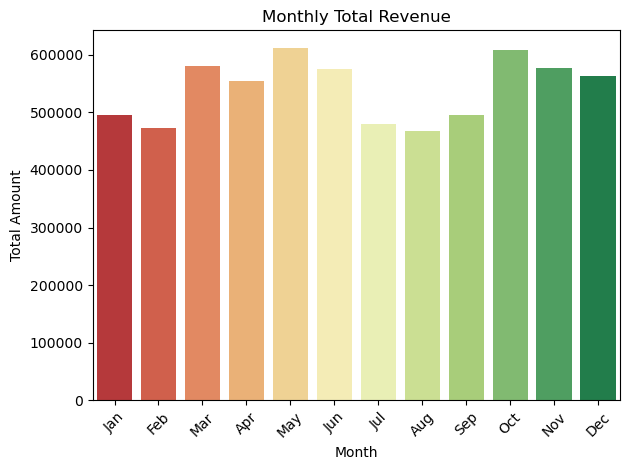

In [839]:
#monthly revenue trend visualization analysis
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values,order=month_order,palette = 'RdYlGn') 
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [841]:
df_copy.shape

(218714, 22)

In [842]:
# Calculate proportion of each quarter
month_dict = {'Jan':'Q1','Feb':'Q1','Mar':'Q1',
              'Apr':'Q2','May':'Q2','Jun':'Q2',
              'Jul':'Q3','Aug':'Q3','Sep':'Q3',
              'Oct':'Q4','Nov':'Q4','Dec':'Q4'}

df_copy['quarter'] = df_copy['month'].map(month_dict)


In [843]:
# df_copy.head()
quarter_revenue = df_copy.groupby('quarter')['total_amount'].sum()
quarter_revenue

quarter
Q1    1549142.66
Q2    1741628.67
Q3    1443115.92
Q4    1746884.41
Name: total_amount, dtype: float64

In [844]:
total_revenue = df_copy['total_amount'].sum()
quarter_revenue_percent = (quarter_revenue/total_revenue) * 100 
quarter_revenue_percent #Q4 has the highest revenue 

quarter
Q1    23.903676
Q2    26.873785
Q3    22.267656
Q4    26.954883
Name: total_amount, dtype: float64

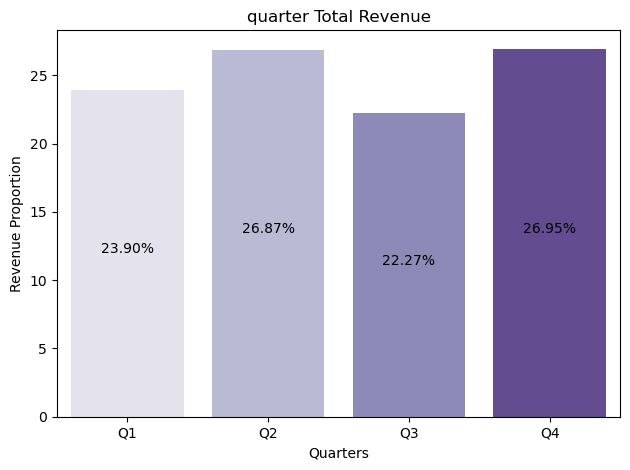

In [845]:
ax = sns.barplot(x=quarter_revenue_percent.index, y=quarter_revenue_percent.values,palette='Purples') 
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%',label_type='center',fontsize=10,color='black',padding =3)
plt.title('quarter Total Revenue')
plt.xlabel('Quarters')
plt.ylabel('Revenue Proportion')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [847]:
# Show how trip fare is affected by distance
df_copy_filtered = df_copy[df_copy['trip_distance']>0]
correlation_matrix = df_copy_filtered[['trip_distance','fare_amount']].corr()
correlation_matrix


trip_distance  fare_amount
trip_distance       1.000000     0.949374
fare_amount         0.949374     1.000000

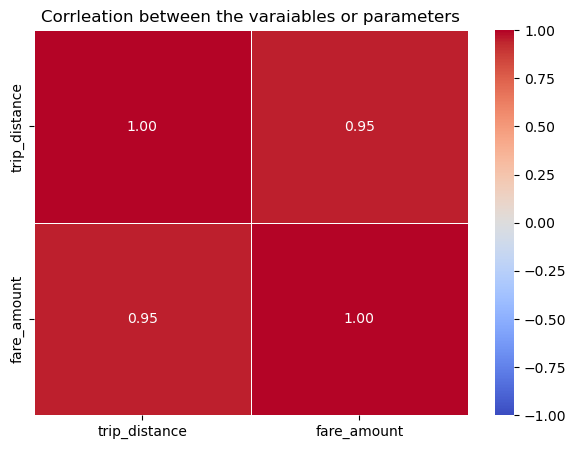

In [848]:
plt.figure(figsize=(7,5))
sns.heatmap(data=correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, center=0)
plt.title('Corrleation between the varaiables or parameters')
plt.show() # trip distance and fare amount seems to be linearly related it means higher the distance higher the fare at first glance

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [850]:
# Show relationship between fare and trip duration
df_copy_filtered['trip_duration'] = pd.to_datetime(df_copy_filtered['tpep_dropoff_datetime']) - pd.to_datetime(df_copy_filtered['tpep_pickup_datetime'])
df_copy_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 218131 entries, 2 to 284491
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   VendorID               218131 non-null  int64          
 1   tpep_pickup_datetime   218131 non-null  object         
 2   tpep_dropoff_datetime  218131 non-null  object         
 3   passenger_count        218131 non-null  float64        
 4   trip_distance          218131 non-null  float64        
 5   RatecodeID             218131 non-null  float64        
 6   PULocationID           218131 non-null  int64          
 7   DOLocationID           218131 non-null  int64          
 8   payment_type           218131 non-null  int64          
 9   fare_amount            218131 non-null  float64        
 10  extra                  218131 non-null  float64        
 11  mta_tax                218131 non-null  float64        
 12  tip_amount             218131 non-n

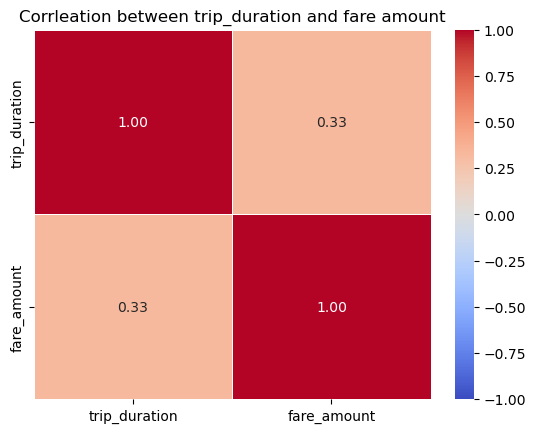

In [851]:
fare_trip_corr = df_copy_filtered[['trip_duration','fare_amount']].corr()
sns.heatmap(data=fare_trip_corr,annot=True,fmt='.2f',cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, center=0)
plt.title('Corrleation between trip_duration and fare amount')
plt.show()

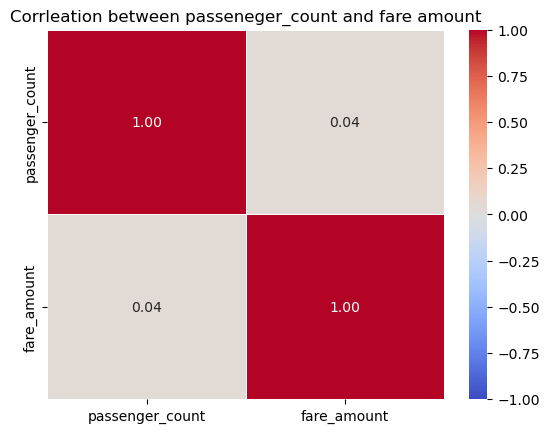

In [852]:
# Show relationship between fare and number of passengers
fare_pass_corr = df_copy_filtered[['passenger_count','fare_amount']].corr()
sns.heatmap(data=fare_pass_corr,annot=True,fmt='.2f',cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, center=0)
plt.title('Corrleation between passeneger_count and fare amount')
plt.show()
# doesnt seem to have a linear relationship among eachother

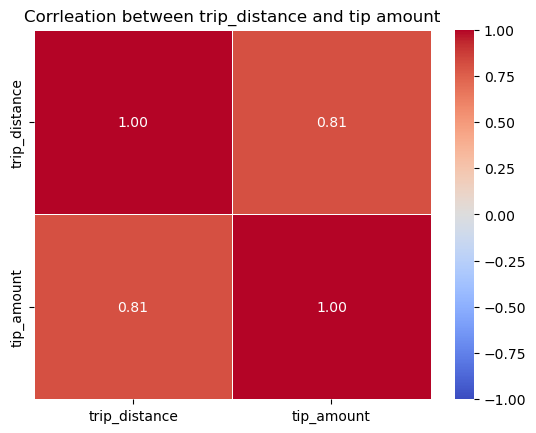

In [853]:
# Show relationship between tip and trip distance
tip_trip_corr = df_copy_filtered[['trip_distance','tip_amount']].corr()
sns.heatmap(data= tip_trip_corr,annot=True,fmt='.2f',cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, center=0)
plt.title('Corrleation between trip_distance and tip amount')
plt.show()
# seems to have a signifiant positive linear relation among them

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

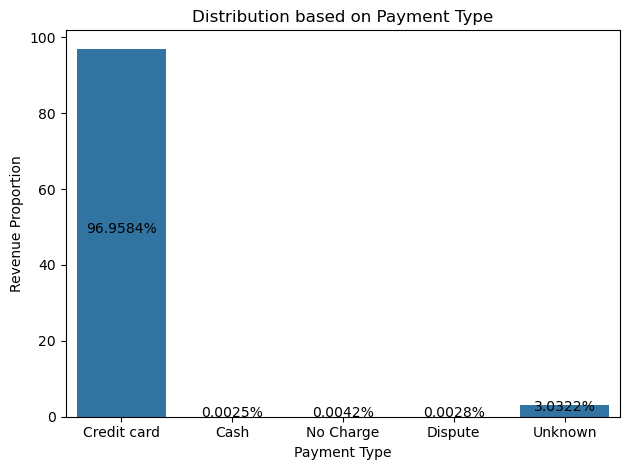

In [855]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown'
}
payment_type_distribution = (df_copy.groupby('payment_type')['total_amount'].sum()).rename(index=payment_type_mapping)
pay_type_percent = (payment_type_distribution/df_copy['total_amount'].sum())*100
pay_type_percent
payment_type_order = ['Credit card','Cash','No Charge','Dispute','Unknown']
ax = sns.barplot(x=pay_type_percent.index, y=pay_type_percent.values,order=payment_type_order) 
for container in ax.containers:
    ax.bar_label(container,fmt='%.4f%%',label_type='center',fontsize=10,color='black',padding =3)
plt.title('Distribution based on Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Revenue Proportion')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [860]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [862]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("C:\\Users\\HP\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp") #read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

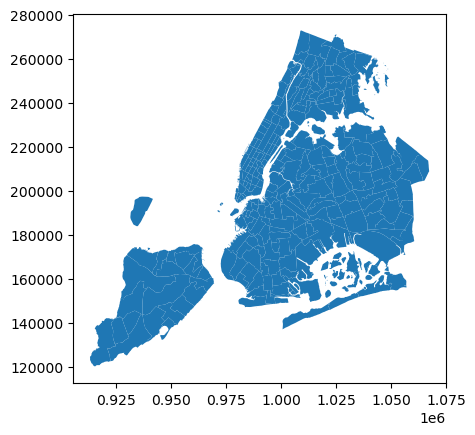

In [864]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [867]:
# Merge zones and trip records using locationID and PULocationID
df1 = pd.merge(df_copy,zones,left_on='PULocationID', right_on='LocationID', how='left')
#df1.isnull().sum()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218717 entries, 0 to 218716
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               218717 non-null  int64         
 1   tpep_pickup_datetime   218717 non-null  object        
 2   tpep_dropoff_datetime  218717 non-null  object        
 3   passenger_count        218717 non-null  float64       
 4   trip_distance          218717 non-null  float64       
 5   RatecodeID             218717 non-null  float64       
 6   PULocationID           218717 non-null  int64         
 7   DOLocationID           218717 non-null  int64         
 8   payment_type           218717 non-null  int64         
 9   fare_amount            218717 non-null  float64       
 10  extra                  218717 non-null  float64       
 11  mta_tax                218717 non-null  float64       
 12  tip_amount             218717 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [869]:
#Group data by location and calculate the number of trips
trip_counts = df1.groupby('LocationID').size()
trip_counts = trip_counts.reset_index(name = 'Number of Trips')
trip_counts

LocationID  Number of Trips
0           1.0                5
1           4.0              262
2           6.0                1
3           7.0               52
4           8.0                2
..          ...              ...
181       259.0                1
182       260.0               26
183       261.0             1092
184       262.0             3109
185       263.0             4343

[186 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [871]:
# Merge trip counts back to the zones GeoDataFrame
zones = pd.merge(zones,trip_counts,on='LocationID',how='left')
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         263 non-null    int32   
 1   Shape_Leng       263 non-null    float64 
 2   Shape_Area       263 non-null    float64 
 3   zone             263 non-null    object  
 4   LocationID       263 non-null    int32   
 5   borough          263 non-null    object  
 6   geometry         263 non-null    geometry
 7   Number of Trips  187 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


In [872]:
#analysing null values for number of trips in zones df
zones[zones['Number of Trips'].isnull()]
zones['Number of Trips'] = zones['Number of Trips'].fillna(0)
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         263 non-null    int32   
 1   Shape_Leng       263 non-null    float64 
 2   Shape_Area       263 non-null    float64 
 3   zone             263 non-null    object  
 4   LocationID       263 non-null    int32   
 5   borough          263 non-null    object  
 6   geometry         263 non-null    geometry
 7   Number of Trips  263 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

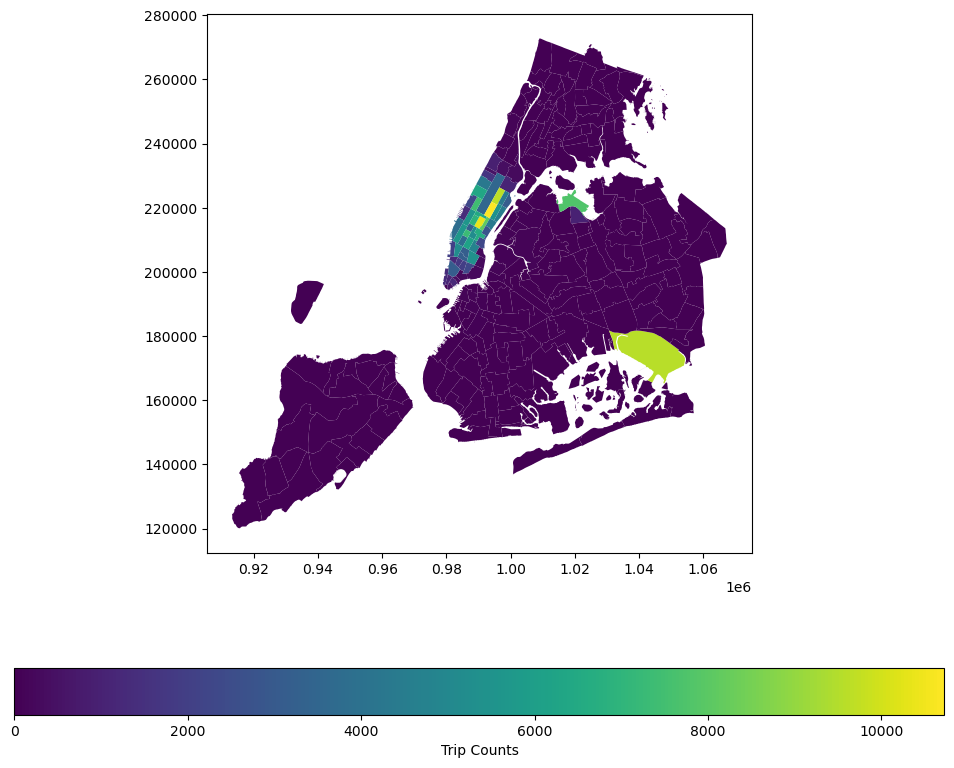

In [876]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column = 'Number of Trips',ax = ax, legend=True,legend_kwds = {'label':"Trip Counts",'orientation':"horizontal"})


In [877]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by = 'Number of Trips',ascending=False)
zones_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
131       132    0.245479    0.002038            JFK Airport         132   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     Number of Trips  
236          10729.0  
160          10389.0  
235           9678.0  
131           9560.0  
161           8111.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [886]:
#Find routes which have the slowest speeds at different times of the day
# Ensure datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

# Calculate trip duration in hours
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 3600

faulty_trip_duration = df1[df1['trip_duration']<=0].index
df1 = df1.drop(faulty_trip_duration)

zero_trip_distance = df1[df1['trip_distance']<=0].index
df1 = df1.drop(zero_trip_distance)

# Group by pickup and dropoff location with hour
df_grouped = df1.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_time=('trip_duration', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()
df_grouped['avg_speed'] = df_grouped['avg_distance']/(df_grouped['avg_time'])
df_sorted = df_grouped.sort_values(by='avg_speed',ascending=True)
df_sorted.head(5)

PULocationID  DOLocationID  pickup_hour   avg_time  avg_distance  \
42644           232           231           14  23.730556          1.41   
34816           170             4           14  23.369722          1.73   
16396           125           232           20  23.741944          2.13   
47562           238           163            5  23.244722          2.38   
14944           114            66           22  23.241944          2.96   

       avg_speed  
42644   0.059417  
34816   0.074027  
16396   0.089715  
47562   0.102389  
14944   0.127356

How does identifying high-traffic, high-demand routes help us?
1. Identifying high-traffic and high-demand routes will help to taxi_services to put more taxis and drivers on that route, which can reduce wait times and will provide better experience to customer.
2. More rides will result to more revenue, which can be generated on that routes 

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

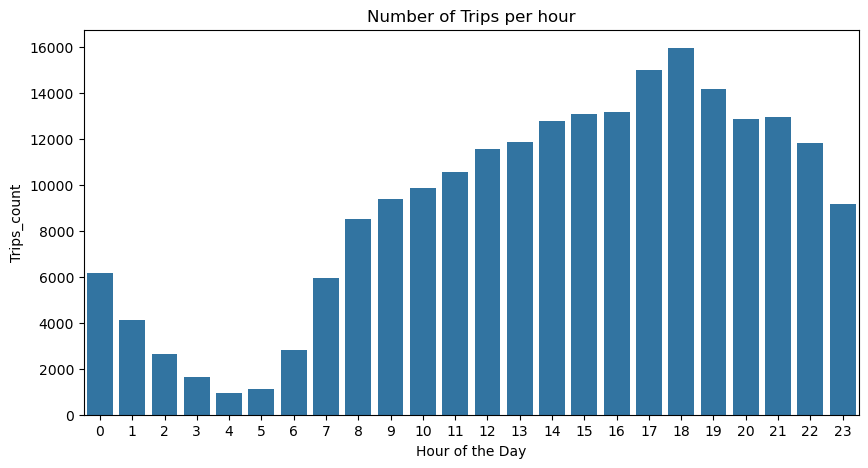

In [889]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df1['pickup_hour'].value_counts().sort_index()
trips_per_hour

plt.figure(figsize=(10,5))
sns.barplot(x=trips_per_hour.index,y=trips_per_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Trips_count')
plt.title('Number of Trips per hour')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [892]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =100/0.75 # as took 0.75% of the data as a sample_data
trips_per_hour_scaled = trips_per_hour * sample_fraction

trips_per_hour_scaled.sort_values(ascending=False).head(5).astype(int)

pickup_hour
18    2126666
17    1997866
19    1890400
16    1757333
15    1745066
Name: count, dtype: int32

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

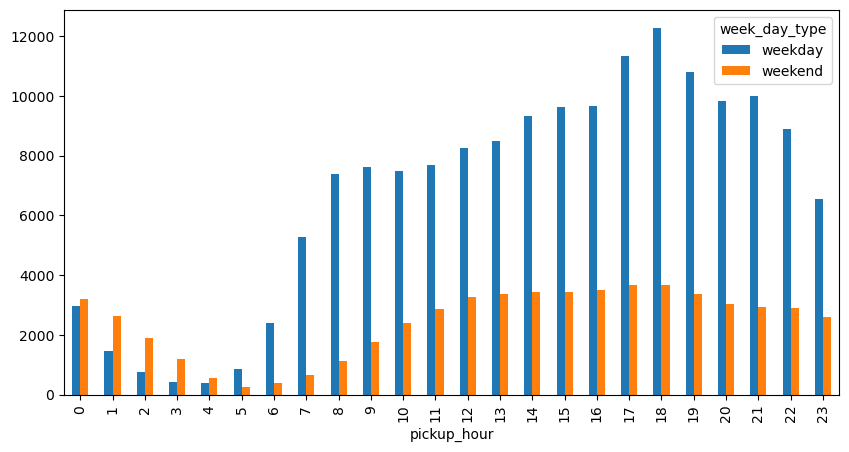

In [894]:
# Compare traffic trends for the week days and weekends

weekday_mapping={'Monday':'weekday','Tuesday':'weekday','Wednesday':'weekday','Thursday':'weekday','Friday':'weekday','Saturday':'weekend','Sunday':'weekend'}
df1['week_day_type'] = df1['day_of_week'].map(weekday_mapping)
weekly_traffic = df1.groupby(['week_day_type', 'pickup_hour']).size().reset_index(name='trip_count')

traffic_pivot = weekly_traffic.pivot(index='pickup_hour', columns='week_day_type', values='trip_count')
traffic_pivot.plot.bar(figsize=(10,5))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
1. we can effectively use the cabs and drivers accordingly , which will reduce running cost without comprimising on revenue, which will lead to higher efficieny
2. we can reduce cabs and drivers on weekends compared to weekdays where we can increase cabs and drivers for more revenue and efficient usage of manpower and taxi

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [897]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
1         1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
2         2  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   
3         2  2023-01-01 00:53:18   2023-01-01 01:08:17              2.0   
4         2  2023-01-01 00:21:02   2023-01-01 00:35:56              5.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.92         1.0            79           107             1   
1           2.30         1.0            48           238             1   
2           2.27         1.0            68           137             1   
3           3.45         1.0            48            41             1   
4           4.79         1.0           162            79             1   

   fare_amount  ...  quarter  OBJECTID  Shape_Leng  Shape_Area          zone  \
0          7.2  ...       Q1      79.0    0.042625    0.000108  East Village   
1         13.5  ...       Q1      48.0    0.043747    0.000094  Clinton East   
2         18.4  ...       Q1      68.0    0.049337    0.000111  East Chelsea   
3         17.7  ...       Q1      48.0    0.043747    0.000094  Clinton East   
4         23.3  ...       Q1     162.0    0.035270    0.000048  Midtown East   

   LocationID    borough                                           geometry  \
0        79.0  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
1        48.0  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
2        68.0  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
3        48.0  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
4       162.0  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

   trip_duration  week_day_type  
0       0.076111        weekend  
1       0.236111        weekend  
2       0.321944        weekend  
3       0.249722        weekend  
4       0.248333        weekend  

[5 rows x 32 columns]

In [898]:
df1.loc[df1['LocationID']==236]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
61             2  2023-01-01 01:28:56   2023-01-01 01:33:38              1.0   
73             2  2023-01-01 02:51:08   2023-01-01 02:58:15              1.0   
147            2  2023-01-01 09:24:43   2023-01-01 09:40:48              2.0   
182            1  2023-01-01 11:08:47   2023-01-01 11:20:37              1.0   
187            2  2023-01-01 12:14:00   2023-01-01 12:26:39              1.0   
...          ...                  ...                   ...              ...   
218633         2  2023-12-31 19:22:53   2023-12-31 19:29:27              2.0   
218647         1  2023-12-31 20:23:07   2023-12-31 20:27:36              1.0   
218652         1  2023-12-31 20:09:17   2023-12-31 20:12:48              2.0   
218664         2  2023-12-31 21:26:24   2023-12-31 21:30:06              3.0   
218675         2  2023-12-31 21:18:17   2023-12-31 21:20:37              2.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
61               0.58         1.0           236           263             1   
73               1.34         1.0           236           239             1   
147              8.76         1.0           236           138             1   
182              2.20         1.0           236           161             1   
187              3.27         1.0           236           186             5   
...               ...         ...           ...           ...           ...   
218633           1.24         1.0           236           239             1   
218647           0.60         1.0           236           236             1   
218652           0.90         1.0           236           237             1   
218664           0.44         1.0           236           236             1   
218675           0.31         1.0           236           263             1   

        fare_amount  ...  quarter  OBJECTID  Shape_Leng  Shape_Area  \
61             6.50  ...       Q1     236.0    0.044252    0.000103   
73            10.00  ...       Q1     236.0    0.044252    0.000103   
147           35.90  ...       Q1     236.0    0.044252    0.000103   
182           12.80  ...       Q1     236.0    0.044252    0.000103   
187           23.27  ...       Q1     236.0    0.044252    0.000103   
...             ...  ...      ...       ...         ...         ...   
218633         8.60  ...       Q4     236.0    0.044252    0.000103   
218647         6.50  ...       Q4     236.0    0.044252    0.000103   
218652         6.50  ...       Q4     236.0    0.044252    0.000103   
218664         5.80  ...       Q4     236.0    0.044252    0.000103   
218675         4.40  ...       Q4     236.0    0.044252    0.000103   

                         zone  LocationID    borough  \
61      Upper East Side North       236.0  Manhattan   
73      Upper East Side North       236.0  Manhattan   
147     Upper East Side North       236.0  Manhattan   
182     Upper East Side North       236.0  Manhattan   
187     Upper East Side North       236.0  Manhattan   
...                       ...         ...        ...   
218633  Upper East Side North       236.0  Manhattan   
218647  Upper East Side North       236.0  Manhattan   
218652  Upper East Side North       236.0  Manhattan   
218664  Upper East Side North       236.0  Manhattan   
218675  Upper East Side North       236.0  Manhattan   

                                                 geometry  trip_duration  \
61      POLYGON ((995940.048 221122.92, 995812.322 220...       0.078333   
73      POLYGON ((995940.048 221122.92, 995812.322 220...       0.118611   
147     POLYGON ((995940.048 221122.92, 995812.322 220...       0.268056   
182     POLYGON ((995940.048 221122.92, 995812.322 220...       0.197222   
187     POLYGON ((995940.048 221122.92, 995812.322 220...       0.210833   
...                                                   ...            ...   
218633  POLYGON ((995940.048 221122.92, 

In [899]:
# Find top 10 pickup and dropoff zones
pickup_zones = df1.groupby(['zone','pickup_hour']).size().reset_index(name = 'hourly_pickups')
pickup_zones_pivot = pickup_zones.pivot(index='zone', columns='pickup_hour', values='hourly_pickups')
pickup_zones.sort_values(by= 'hourly_pickups',ascending=False).head(10)

zone  pickup_hour  hourly_pickups
1339         Midtown Center           18            1011
1338         Midtown Center           17             876
1973  Upper East Side South           18             832
1972  Upper East Side South           17             821
1949  Upper East Side North           18             801
1969  Upper East Side South           14             800
1337         Midtown Center           16             800
1970  Upper East Side South           15             792
1946  Upper East Side North           15             792
1340         Midtown Center           19             791

In [900]:
df2 = pd.merge(df_copy,zones,left_on='DOLocationID', right_on='LocationID', how='left')
df2['dropoff_hour'] = pd.to_datetime (df2['tpep_dropoff_datetime']).dt.hour
dropoff_zones = df2.groupby(['zone','dropoff_hour']).size().reset_index(name = 'hourly_dropoffs')
dropoff_zones_pivot = dropoff_zones.pivot(index='zone', columns='dropoff_hour', values='hourly_dropoffs')
dropoff_zones.sort_values(by= 'hourly_dropoffs',ascending=False).head(10)

zone  dropoff_hour  hourly_dropoffs
3443  Upper East Side North            18              841
3467  Upper East Side South            18              828
3442  Upper East Side North            17              797
3440  Upper East Side North            15              785
3439  Upper East Side North            14              752
3441  Upper East Side North            16              741
3464  Upper East Side South            15              735
2299         Midtown Center             8              724
3444  Upper East Side North            19              721
3466  Upper East Side South            17              719

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [902]:
# # Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_zone = df1['zone'].value_counts().reset_index(name='pickup_count')
dropoff_zone = df2['zone'].value_counts().reset_index(name='dropoff_count')
pickup_dropoff = pd.merge(pickup_zone,dropoff_zone,on='zone', how='inner')
pickup_dropoff
pickup_dropoff['p_d_ratio'] = pickup_dropoff['pickup_count']/(pickup_dropoff['dropoff_count'])
Top_10 = pickup_dropoff.sort_values(by='p_d_ratio',ascending=False).head(10).reset_index(drop=True)
Bottom_10 = pickup_dropoff.sort_values(by='p_d_ratio',ascending=True).head(10).reset_index(drop=True)

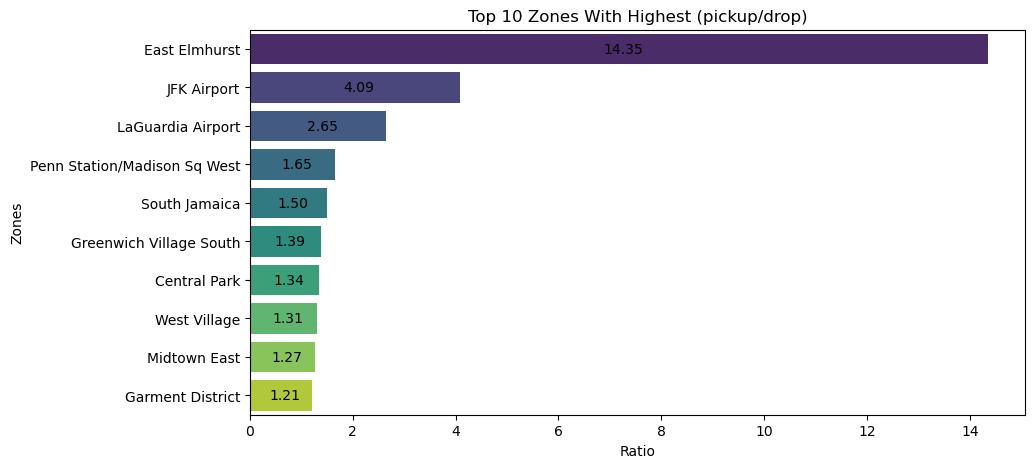

In [903]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=Top_10['p_d_ratio'], y=Top_10['zone'],palette='viridis') 
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',label_type='center',fontsize=10,color='black',padding =3)
plt.xlabel('Ratio')
plt.ylabel('Zones')
plt.title('Top 10 Zones With Highest (pickup/drop)')
plt.show()

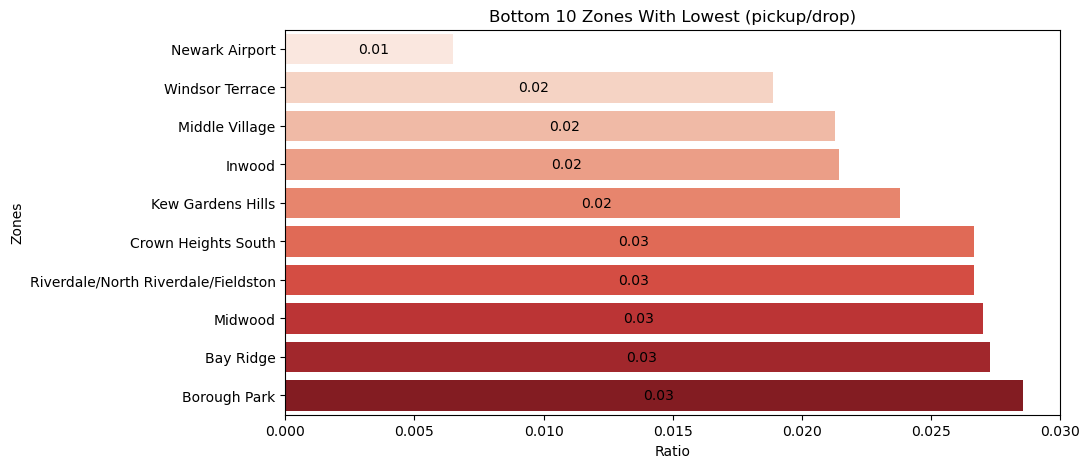

In [904]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=Bottom_10['p_d_ratio'], y=Bottom_10['zone'],palette='Reds')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',label_type='center',fontsize=10,color='black',padding =3)
plt.xlabel('Ratio')
plt.ylabel('Zones')
plt.title('Bottom 10 Zones With Lowest (pickup/drop)')
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [906]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
hours_mapping={0:'night hour',1:'night hour',2:'night hour',3:'night hour',4:'night hour',5:'night hour',23:'night hour',
               6:'day hour',7:'day hour',8:'day hour',9:'day hour',10:'day hour',11:'day hour',12:'day hour',
               13:'day hour',14:'day hour',15:'day hour',16:'day hour',17:'day hour',
               18:'day hour',19:'day hour',20:'day hour',21:'day hour',22:'day hour',}
pickup_zones['hours_type'] = pickup_zones['pickup_hour'].map(hours_mapping)
pickup_zones
night_hour_zones = pickup_zones[pickup_zones['hours_type'] != 'day hour']
night_hour_zones_pickups = night_hour_zones.groupby(['zone'])['hourly_pickups'].sum().reset_index(name='pickup_counts')
Top_10_night_hour_zones_pickups= night_hour_zones_pickups.sort_values(by='pickup_counts',ascending=False).head(10).reset_index(drop=True)

Top_10_night_hour_zones_pickups



zone  pickup_counts
0                  East Village           1982
1                  West Village           1612
2                   JFK Airport           1431
3                  Clinton East           1233
4               Lower East Side           1213
5       Greenwich Village South           1213
6     Times Sq/Theatre District            899
7  Penn Station/Madison Sq West            805
8                 Midtown South            756
9                      Gramercy            721

In [907]:
dropoff_zones['hours_type'] = dropoff_zones['dropoff_hour'].map(hours_mapping)
dropoff_zones
night_hour_drop_zones = dropoff_zones[dropoff_zones['hours_type'] != 'day hour']
night_hour_zones_dropoffs = night_hour_drop_zones.groupby(['zone'])['hourly_dropoffs'].sum().reset_index(name='dropoff_counts')
Top_10_night_hour_zones_dropoffs= night_hour_zones_dropoffs.sort_values(by='dropoff_counts',ascending=False).head(10).reset_index(drop=True)
Top_10_night_hour_zones_dropoffs

zone  dropoff_counts
0           East Village            1132
1            Murray Hill             907
2           Clinton East             843
3               Gramercy             840
4        Lenox Hill West             786
5         Yorkville West             759
6           East Chelsea             712
7           West Village             696
8  Upper East Side North             685
9  Upper West Side South             645

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [909]:
# Filter for night hours (11 PM to 5 AM)
df1['hours_type'] = df1['pickup_hour'].map(hours_mapping)
night_hour_revenue = df1.groupby('hours_type')['total_amount'].sum().reset_index(name='total_revenue')
revenue_sum = night_hour_revenue['total_revenue'].sum()
night_hour_revenue['revenue_percent(%)'] = night_hour_revenue['total_revenue'].apply(lambda x: (x/revenue_sum)*100)
night_hour_revenue


hours_type  total_revenue  revenue_percent(%)
0    day hour     5683007.99           87.949199
1  night hour      778685.87           12.050801

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [912]:
df1['fare_per_mile'] = df1['fare_amount']/df1['trip_distance']
df1['fare_per_mile_per_passenger'] = df1['fare_per_mile']/df1['passenger_count']
passenger_fare_analysis = df1.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index(name='fare/mile/passenger')
passenger_fare_analysis

passenger_count  fare/mile/passenger
0              1.0             9.245498
1              2.0             5.132266
2              3.0             3.948409
3              4.0             4.024140
4              5.0             1.513999
5              6.0             1.268159

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

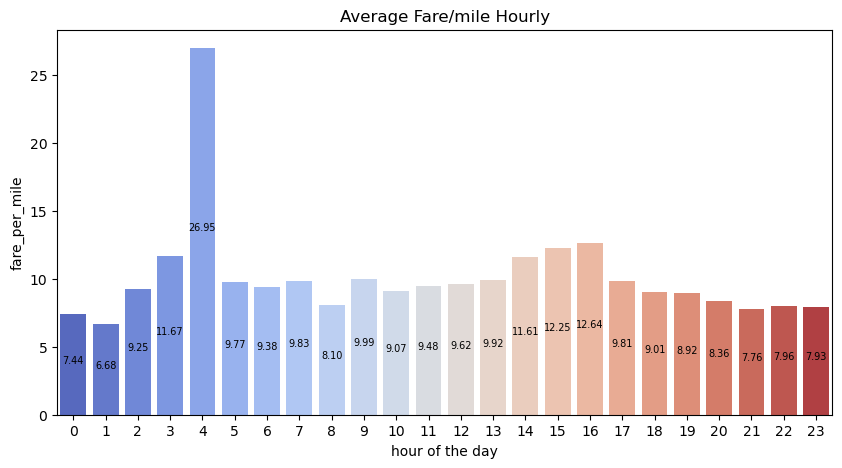

In [914]:
# Compare the average fare per mile for different days and for different times of the day
fare_per_mile_hourly = df1.groupby('pickup_hour')['fare_per_mile'].mean().reset_index(name='fare/mile/hourly')
fare_per_mile_hourly
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=fare_per_mile_hourly['pickup_hour'], y=fare_per_mile_hourly['fare/mile/hourly'],palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',label_type='center',fontsize=7,color='black',padding =3)
plt.xlabel('hour of the day')
plt.ylabel('fare_per_mile')
plt.title('Average Fare/mile Hourly')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

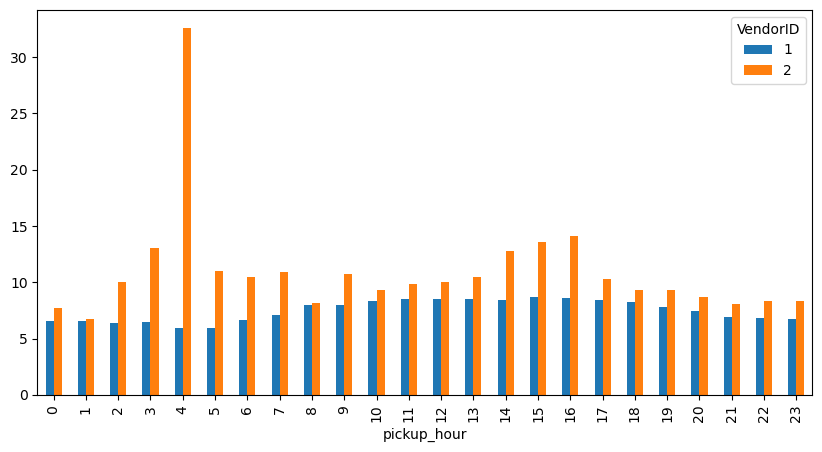

In [916]:
# Compare fare per mile for different vendors
fare_per_mile_vendor = df1.groupby(['VendorID','pickup_hour'])['fare_per_mile'].mean().reset_index(name='fare/mile/hour/vendor')
fare_per_mile_vendor
fare_pivot = fare_per_mile_vendor.pivot(index='pickup_hour', columns='VendorID', values='fare/mile/hour/vendor')
fare_pivot.plot.bar(figsize=(10,5))
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [918]:
# Defining distance tiers
df_under_2_miles = df1[df1['trip_distance']<=2]
under_2_miles_analysis = df_under_2_miles.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='fare/mile/under_2_miles')
under_2_miles_analysis



VendorID  fare/mile/under_2_miles
0         1                 9.420878
1         2                13.937765

In [919]:
df_2_5_miles = df1[(df1['trip_distance']>2) & (df1['trip_distance']<=5)]
_2_5_analysis = df_2_5_miles.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='fare/mile/from_2_to_5_miles')
_2_5_analysis

VendorID  fare/mile/from_2_to_5_miles
0         1                     6.369219
1         2                     6.538653

In [920]:
df_above_5_miles = df1[df1['trip_distance']>5]
above_5_analysis = df_above_5_miles.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='fare/mile/above_5_miles')
above_5_analysis

VendorID  fare/mile/above_5_miles
0         1                 4.474459
1         2                 4.493665

In [921]:
merged_df = under_2_miles_analysis.merge(_2_5_analysis, on='VendorID', how='inner').merge(above_5_analysis, on='VendorID', how='inner')
merged_df

VendorID  fare/mile/under_2_miles  fare/mile/from_2_to_5_miles  \
0         1                 9.420878                     6.369219   
1         2                13.937765                     6.538653   

   fare/mile/above_5_miles  
0                 4.474459  
1                 4.493665

<Axes: >

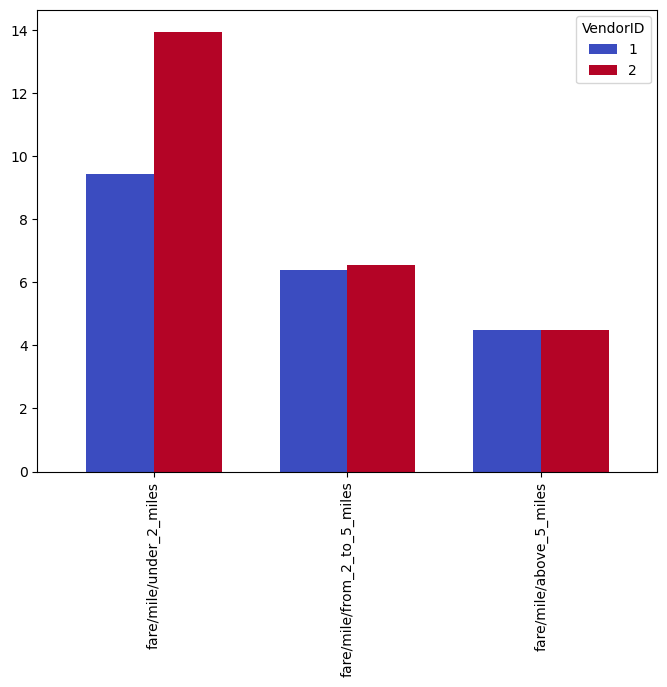

In [922]:
merged_df.set_index('VendorID',inplace=True)
merged_df.T.plot(kind='bar', figsize=(8, 6), colormap='coolwarm', width=0.7)


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [925]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df1['tip_percentage'] = (df1['tip_amount']/df1['fare_amount'])*100
bins = [0, 2, 5, 10, 20, 50, df['trip_distance'].max()]
labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20-50 miles', '50+ miles']
df1['distance_group'] = pd.cut(df1['trip_distance'], bins=bins, labels=labels)
tip_distance_analysis = df1.groupby('distance_group')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
tip_distance_analysis

distance_group  avg_tip_percentage
0      0-2 miles           28.769214
1      2-5 miles           22.987053
2     5-10 miles           22.589781
3    10-20 miles           21.656866
4    20-50 miles           20.158006
5      50+ miles           21.532052

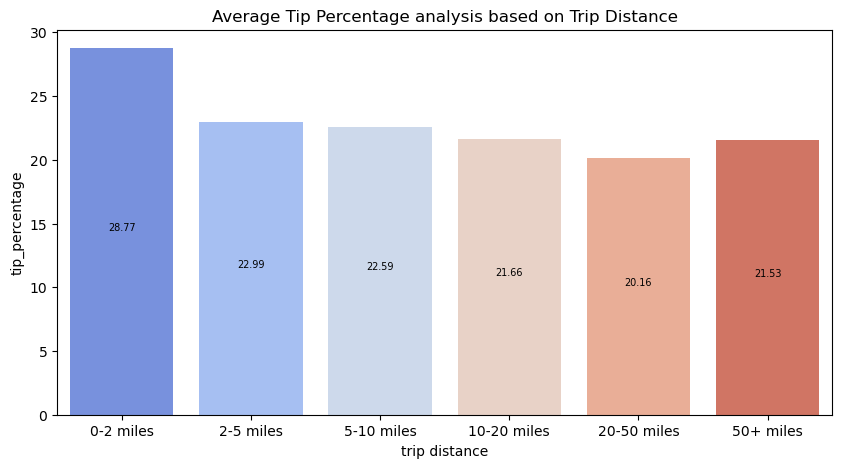

In [926]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=tip_distance_analysis['distance_group'], y=tip_distance_analysis['avg_tip_percentage'],palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',label_type='center',fontsize=7,color='black',padding =3)
plt.xlabel('trip distance')
plt.ylabel('tip_percentage')
plt.title('Average Tip Percentage analysis based on Trip Distance')
plt.show()

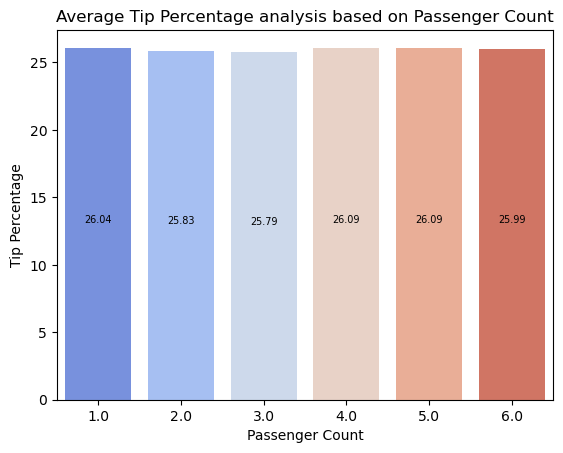

In [927]:
#analysing based on passenger_count
tip_pass_analysis = df1.groupby('passenger_count')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
ax = sns.barplot(x=tip_pass_analysis['passenger_count'], y=tip_pass_analysis['avg_tip_percentage'],palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',label_type='center',fontsize=7,color='black',padding =3)
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.title('Average Tip Percentage analysis based on Passenger Count')
plt.show()

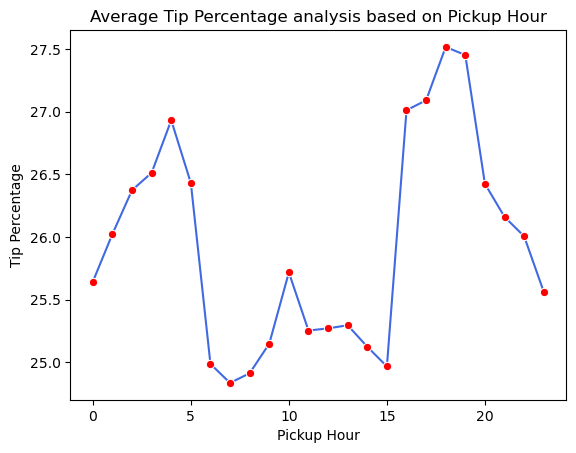

In [928]:
#analysis based on pickup_hour
tip_hour_analysis = df1.groupby('pickup_hour')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
ax = sns.lineplot(x=tip_hour_analysis['pickup_hour'], y=tip_hour_analysis['avg_tip_percentage'],marker='o',color='royalblue', markerfacecolor='red')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.title('Average Tip Percentage analysis based on Pickup Hour')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [930]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

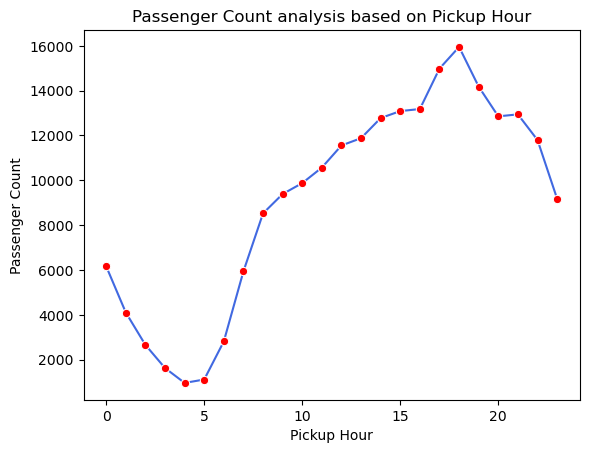

In [932]:
# See how passenger count varies across hours and days
passenger_hour_analysis =df1.groupby('pickup_hour')['passenger_count'].size().reset_index(name='passenger_count')

ax = sns.lineplot(x=passenger_hour_analysis['pickup_hour'], y=passenger_hour_analysis['passenger_count'],marker='o',color='royalblue', markerfacecolor='red')
plt.xlabel('Pickup Hour')
plt.ylabel('Passenger Count')
plt.title('Passenger Count analysis based on Pickup Hour')
plt.show()


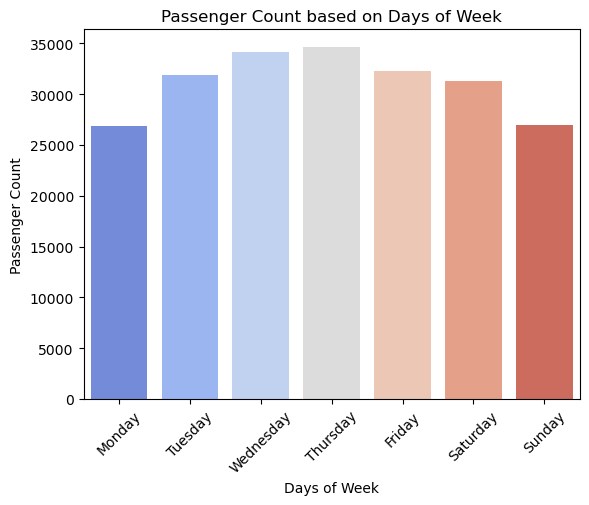

In [933]:
#analysis of passenger count based on days of the week
passenger_day_analysis = df1.groupby('day_of_week')['passenger_count'].size().reset_index(name='passenger_count')
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.barplot(x=passenger_day_analysis['day_of_week'], y=passenger_day_analysis['passenger_count'],order=week_order,palette='coolwarm')
plt.xlabel('Days of Week')
plt.xticks(rotation=45)
plt.ylabel('Passenger Count')
plt.title('Passenger Count based on Days of Week')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [935]:
# How does passenger count vary across zones
zone_passenger_counts = df1.groupby(["zone", "passenger_count"]).size().reset_index(name="count")
zone_passenger_counts = zone_passenger_counts.sort_values(by='count',ascending=False)
zone_passenger_counts



zone  passenger_count  count
529  Upper East Side South              1.0   8659
356         Midtown Center              1.0   8098
523  Upper East Side North              1.0   7820
362           Midtown East              1.0   6646
254            JFK Airport              1.0   6505
..                     ...              ...    ...
380                Midwood              1.0      1
46             Boerum Hill              4.0      1
389             Mount Hope              1.0      1
397         Newark Airport              3.0      1
113    Crown Heights North              3.0      1

[603 rows x 3 columns]

In [936]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Number of Trips  
0              5.0  
1              0.0  
2              0.0  
3            262.0  
4              0.0

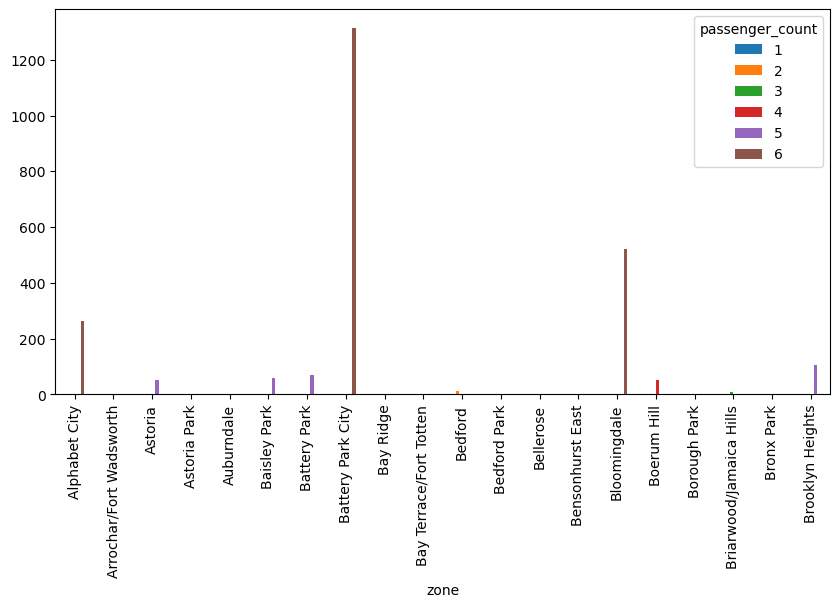

In [937]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_df = pd.merge(zones,zone_passenger_counts,on='zone',how='inner')
zones_trip_analysis = zones_df.groupby(['zone','Number of Trips']).size().reset_index(name='passenger_count')
zone_pivot = zones_trip_analysis.pivot(index='zone', columns='passenger_count', values='Number of Trips').fillna(0)
zone_pivot
zone_20 = zone_pivot.head(20)
zone_20.plot.bar(figsize=(10,5))
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Percentage of trips with each surcharge applied:
improvement_surcharge    100.00
mta_tax                   99.42
congestion_surcharge      95.09
extra                     61.94
Airport_fee                7.98
dtype: float64


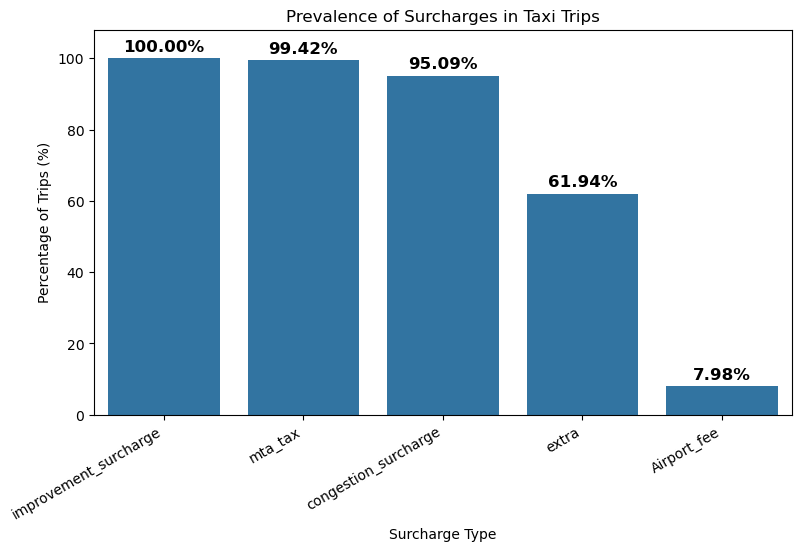

In [940]:
# How often is each surcharge applied?

surcharge_columns = ["extra", "mta_tax", "improvement_surcharge","congestion_surcharge", "Airport_fee"]

surcharge_counts = (df1[surcharge_columns] > 0).sum() # Count non-zero values 
surcharge_percent = (surcharge_counts / len(df1)) * 100 # Convert to percentage

surcharge_percent = surcharge_percent.sort_values(ascending=False)

print("Percentage of trips with each surcharge applied:")
print(surcharge_percent.round(2))

plt.figure(figsize=(9, 5)) # Increase figure width for better spacing 
sns.barplot(x=surcharge_percent.index, y=surcharge_percent.values)
plt.xlabel("Surcharge Type")
plt.ylabel("Percentage of Trips (%)")
plt.title("Prevalence of Surcharges in Taxi Trips")
plt.ylim(0, 108)

for i, v in enumerate(surcharge_percent.values):
    plt.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold")
plt.xticks(rotation=30, ha="right") # Rotate labels for clarity plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Demand-Based Fleet Allocation**
Deploy more taxis during peak hours (15:00–20:00) and reduce idle time during low-demand hours (2:00–6:00).
Implement dynamic pricing and surge-based dispatching to maximize revenue.


**Airport and Surge Area Targeting**

Increase vehicle availability near airports to capitalize on potential untapped demand (only 7.98% of trips include an airport fee).
Offer incentives for drivers to move to high-surcharge areas, such as congested zones.
Pre-Scheduled Rides & Shared Mobility

Encourage pre-booked rides to balance fleet utilization during off-peak hours.
Implement shared ride options to optimize capacity utilization and reduce per-passenger costs.
Operational Efficiency through Data-Driven Dispatching

Reduce empty miles by using AI-driven dispatching to match drivers with the nearest high-demand locations.
Utilize historical demand data to pre-position taxis in areas with anticipated high demand.
By leveraging these strategies, taxi services can enhance revenue, reduce operational inefficiencies, and improve customer satisfaction.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

The key insight is that airport and transit hubs (JFK, LaGuardia, Penn Station) dominate pickup/dropoff activity, while tourist and commercial areas (Greenwich Village, Central Park, Midtown) also see high demand. This suggests that ride demand is driven by travel, commuting, and tourism.

Peak Months (May & October): The highest number of taxi pickups occur in these months, likely due to favorable weather, increased tourism, and events.
Consistent High Demand (March, April, November, December): These months also show strong pickup activity, possibly driven by holiday seasons, business travel, and year-end shopping.

Dip in Summer (July & August): A noticeable decline in pickups during these months may be attributed to vacation periods when many residents leave the city.
Early Year Drop (February): The lower demand in February may be due to cold weather reducing travel needs.

**Strategic Insight:** Taxi operators should increase fleet availability during peak months (May & October) and offer promotions or discounts in low-demand months (July & August) to maintain revenue

Peak Demand (4 PM - 6 PM): The highest number of pickups occurs during the evening rush hour, driven by commuters heading home.

Morning Surge (7 AM - 9 AM): A sharp rise in demand aligns with work commutes, making it another critical time for taxi availability

Midday Steady Demand (10 AM - 3 PM): Gradual increase in pickups, likely influenced by business, tourism, and errands
Late-Night Activity (12 AM - 1 AM): Noticeable spike in pickups, driven by nightlife, shift workers, and travelers 

Low Demand (2 AM - 5 AM): The fewest rides occur during these hours, indicating minimal travel activity!

**Strategic Insight:** Taxi fleets should maximize availability during peak hours and optimize operations during off-peak periods to balance supply and demand efficiently


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Vendor 2 consistently outperforms Vendor 1 across most hours, with a dramatic surge at 4 AM. The steady pattern suggests a balanced demand throughout the day, with higher activity in early mornings and late afternoons.
Consistent Demand: Pickups remain relatively even throughout the day, peaking slightly in the morning and late afternoon.

Business Implications:
Dynamic Pricing Strategy: Introduce higher fares at 4 AM to capitalize on demand.
Fleet Optimization: Increase vehicle availability during peak hours for better revenue generation.
Competitive Tactics for Vendor 1: Vendor 1 should adjust incentives, promotions, or surge pricing strategies to improve its share during high-demand.

Dynamic Surge Pricing – Adjust fares in real-time based on peak hours, weather conditions, and special events to maximize revenue.

Time & Day-Based Adjustments – Implement higher pricing during weekday rush hours and weekend late-night periods while keeping daytime fares competitive.

Zone-Based Differential Pricing – Charge premium rates in high-demand areas like airports and transit hubs while offering lower fares in suburban regions.

Subscription & Loyalty Plans – Introduce membership programs and ride credits to retain frequent users and encourage repeat bookings.

Competitor-Based Adjustments – Monitor rival pricing in real-time and offer targeted discounts to maintain market competitiveness.

Demand Forecasting & Personalized Offers – Leverage data analytics to predict travel trends and provide customized fare discounts for customer retention.